## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Spring 2020

CRISP-DM Framework Description
<img src="https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg" width=60%/>

#### **Table of Contents:**

0. [Part 0: Preparing for analysis](#part0)
1. [Part 1: Exploratory Data Analysis (EDA)](#part1)
2. [Part 2 : Overview of the Datasets](#part2)
3. [Part 3 : Cleaning the Datasets](#part3)
4. [Part 4 : Data Exploration](#part4)
5. [Part 5 : Your Future Home is in ...?](#part5)
6. [Part 6 Conclusion](#part6)
7. [Part 7 Sources](#part7)



# Part 0: Preparing for analysis  <a name="part0"></a>
#### Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

ModuleNotFoundError: No module named 'imblearn'

In [3]:
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')

# Part 1: Exploratory Data Analysis (EDA)  <a name="part1"></a>

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

#### *DATA DICTIONARY*

<table class="tg">
<tbody>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Data Dictionary</strong></td>
</tr>
<tr>
<tr>
<th class="tg-0pky">Variable</th>
<th class="tg-0pky">Variable Name</th>
<th class="tg-0pky">Variable Definition</th>
<th class="tg-fymr">Data Type</th>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash; Numerical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page</strong></td>
<td class="tg-fymr">Administrative</td>
<td class="tg-fymr">Number of visits to the home page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page Duration</strong></td>
<td class="tg-fymr">Administrative_Duration</td>
<td class="tg-fymr">This is the length of time spent on the the home page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>About Us page</strong></td>
<td class="tg-fymr">Informational</td>
<td class="tg-fymr">Number of visits to the information page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Informational Duration</strong></td>
<td class="tg-fymr">Informational Duration</td>
<td class="tg-fymr">This is the length of time spent on the the about us page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product page</strong></td>
<td class="tg-fymr">ProductRelated</td>
<td class="tg-fymr">Number of visits to the product page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Related Duration</strong></td>
<td class="tg-fymr">ProductRelated_Duration</td>
<td class="tg-fymr">This is the length of time spent viewing the products page by the user</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Bounce Rate</strong></td>
<td class="tg-fymr">BounceRates</td>
<td class="tg-fymr">The percentage of single page visits (or web sessions). It is the percentage of visits in which a person leaves your website from the landing page without browsing any further.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Exit Rate</strong></td>
<td class="tg-fymr">ExitRates</td>
<td class="tg-fymr">For all pageviews to the page, Exit Rate is the percentage that were the last in the session</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Page Value</strong></td>
<td class="tg-fymr">PageValues</td>
<td class="tg-fymr">the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Special Day</strong></td>
<td class="tg-fymr">SpecialDay</td>
<td class="tg-fymr">the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash;Categorical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Month</strong></td>
<td class="tg-fymr">Month</td>
<td class="tg-fymr">Month in which the visit took place</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>OperatingSystems</strong></td>
<td class="tg-fymr">OperatingSystems</td>
<td class="tg-fymr">Operating system of the computer in which the user used while viewing the site</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Browser</strong></td>
<td class="tg-fymr">Browser</td>
<td class="tg-fymr">Browser in which the user used to view the site</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Region</strong></td>
<td class="tg-fymr">Region</td>
<td class="tg-fymr">Region wher ethe user is located</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>TrafficType</strong></td>
<td class="tg-fymr">TrafficType</td>
<td class="tg-fymr">TBD</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Visitor Type</strong></td>
<td class="tg-fymr">VisitorType</td>
<td class="tg-fymr">Is this a returing visitor or a new visitor</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Weekend</strong></td>
<td class="tg-fymr">Weekend</td>
<td class="tg-fymr">Did the visit happen on the weekend?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Revenue</strong></td>
<td class="tg-fymr">Revenue</td>
<td class="tg-fymr">Did the visit result in Revenue?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>


In [4]:
profile = ProfileReport(df)

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [5]:
profile

In [6]:
df.dtypes
# The dataset has 10 numerical and 8 categorical variables. 
# Based on the initial import none of the 8 categorical are that data type

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
df_cols = df.columns 
df_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
df_continuous= df[['Administrative','Informational', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',        
                     'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
df_cols2 =df_continuous.columns
# 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType',

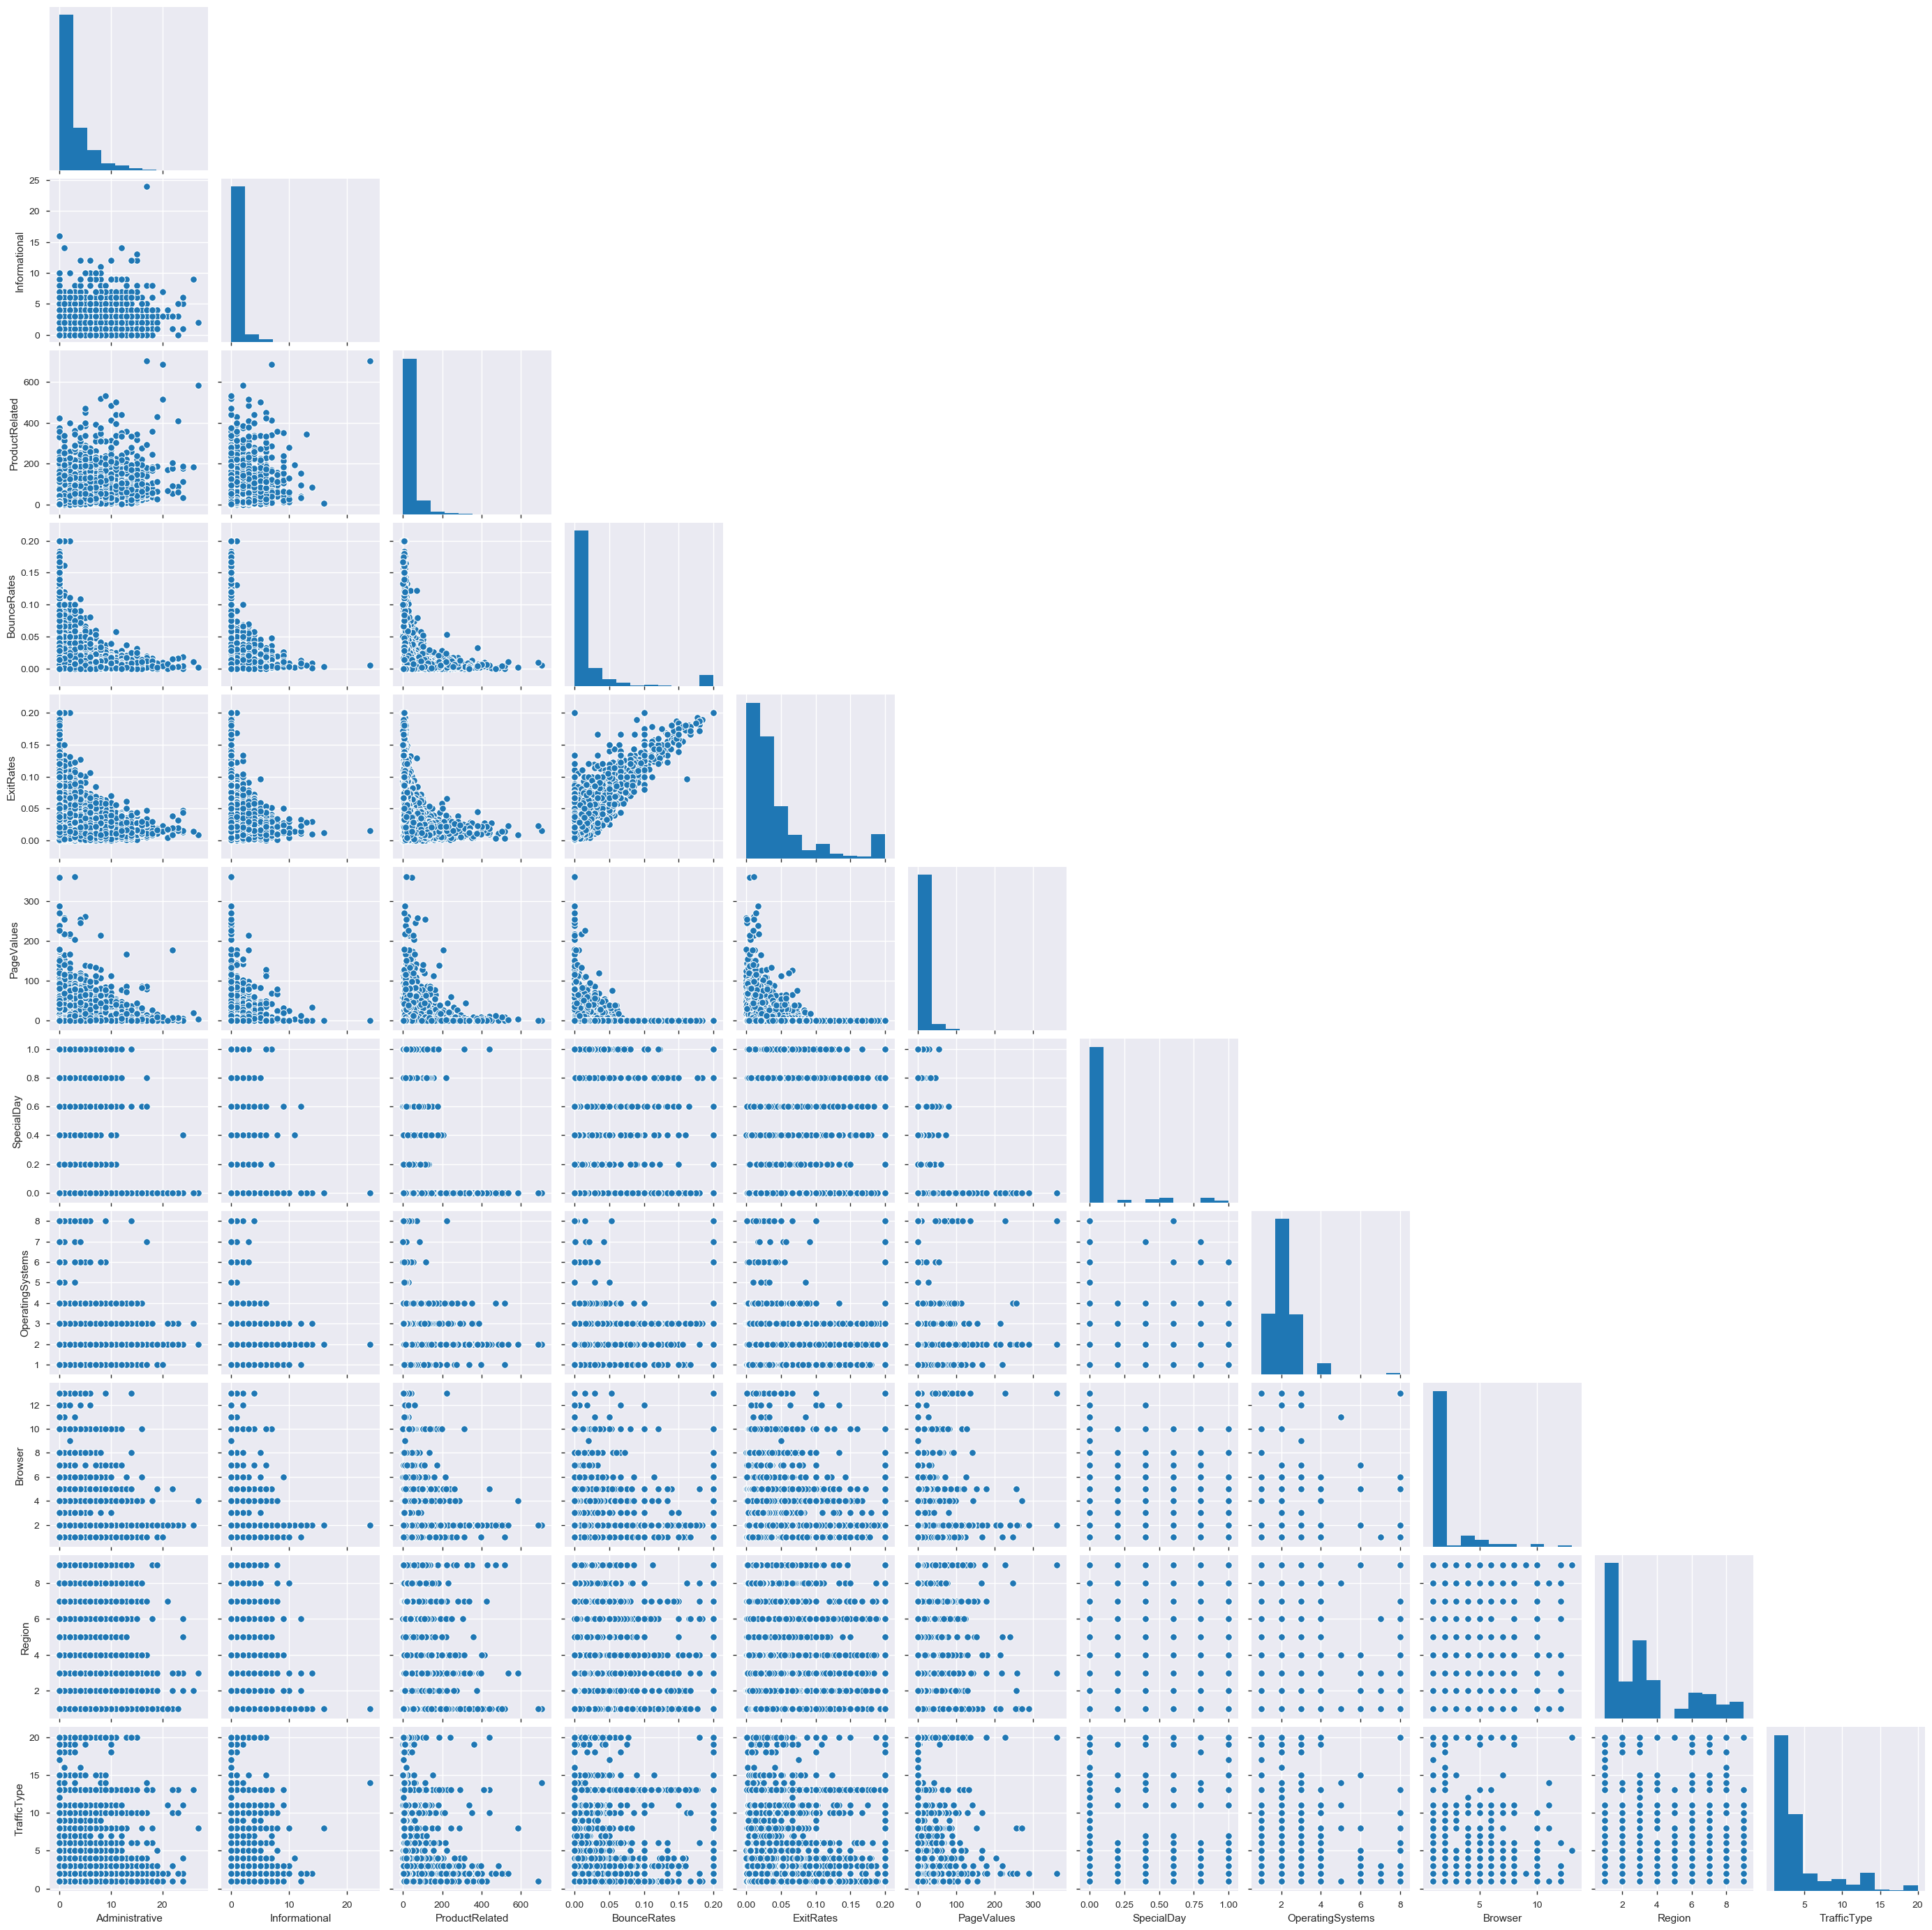

In [9]:
sns.pairplot(df_continuous,corner=True)
# overlay Y on the Exitrate and Administration
# Feature Engeneer based on Exitrates

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188F9295CC0>,
      dtype=object)

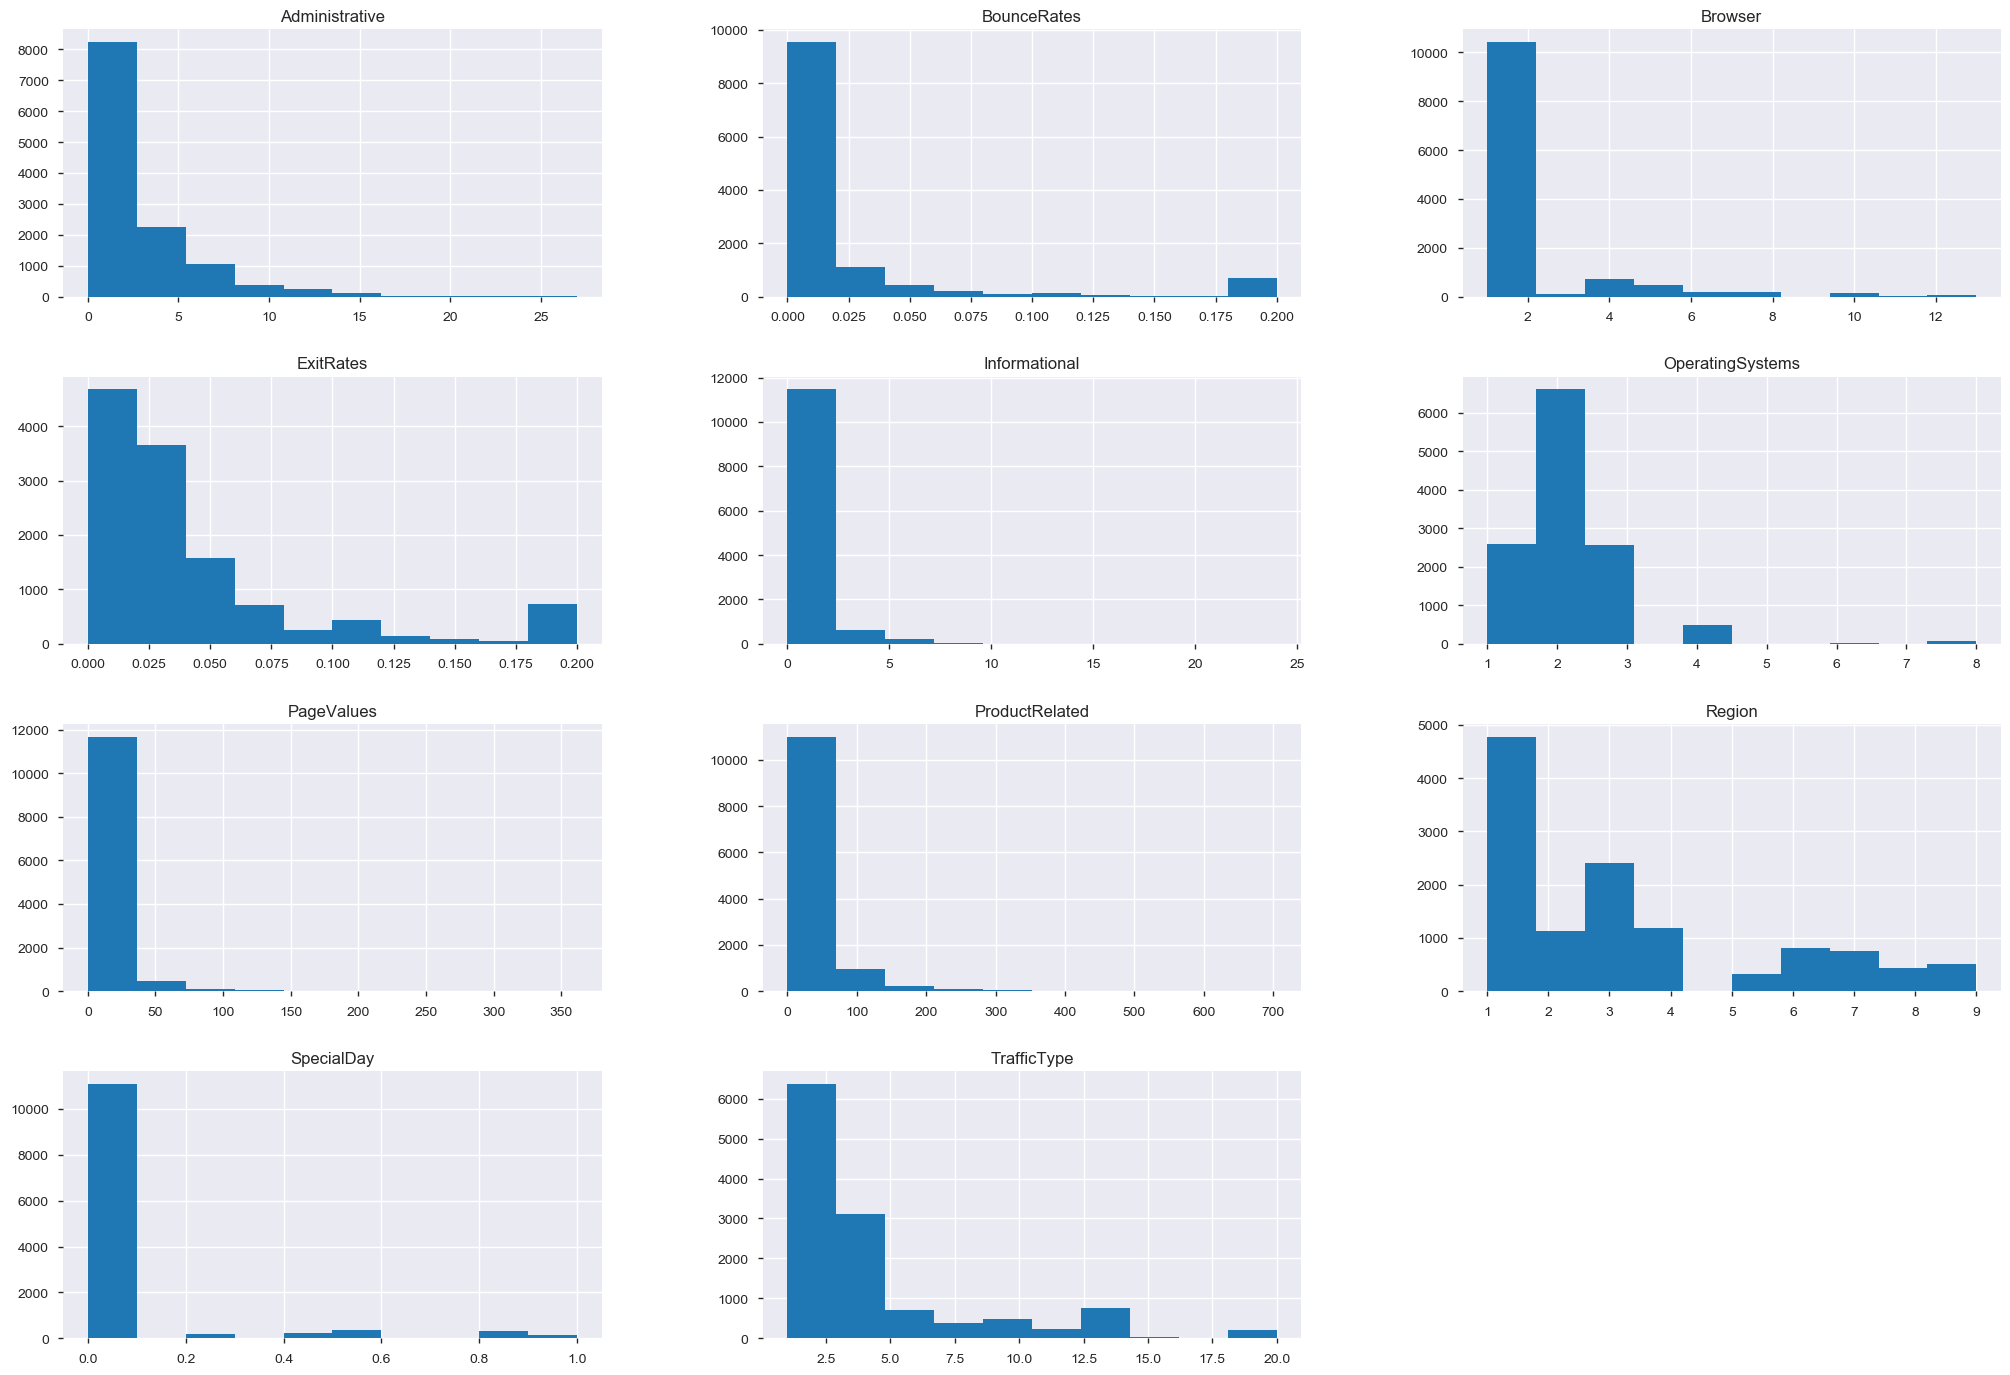

In [10]:
display(df_continuous.hist( figsize = (25,17)))

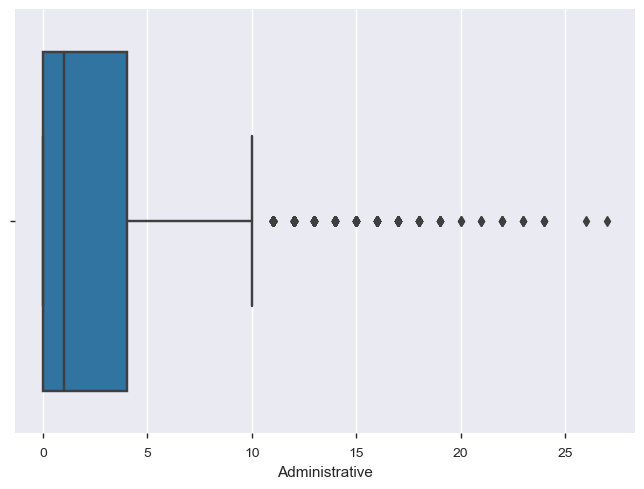

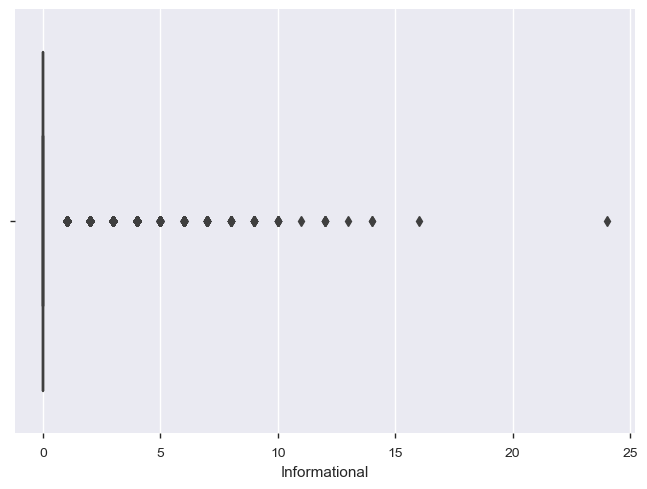

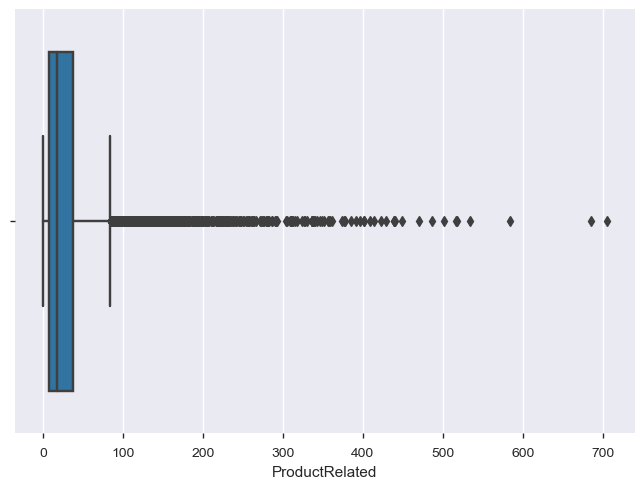

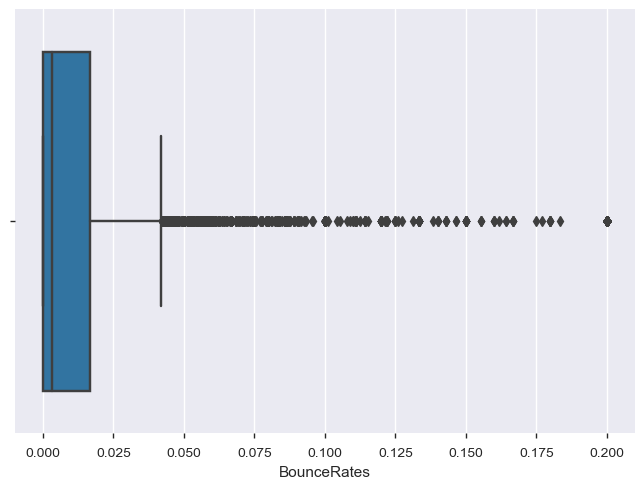

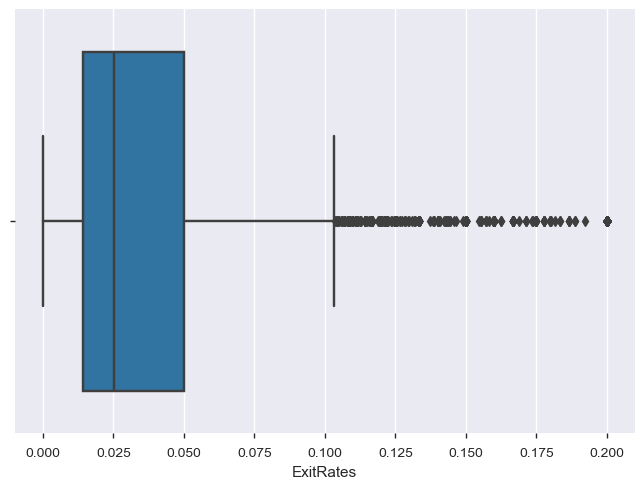

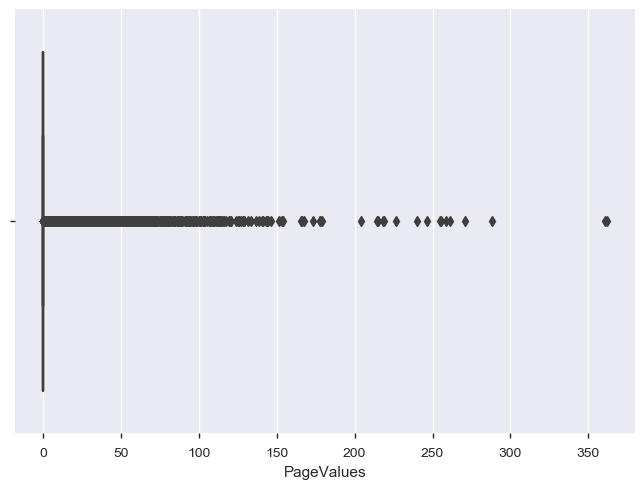

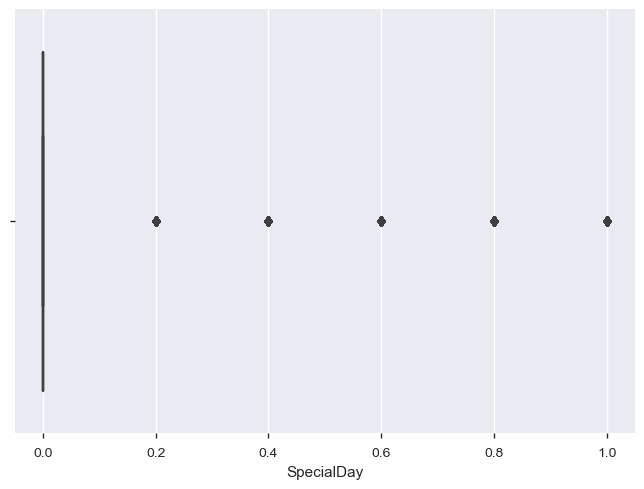

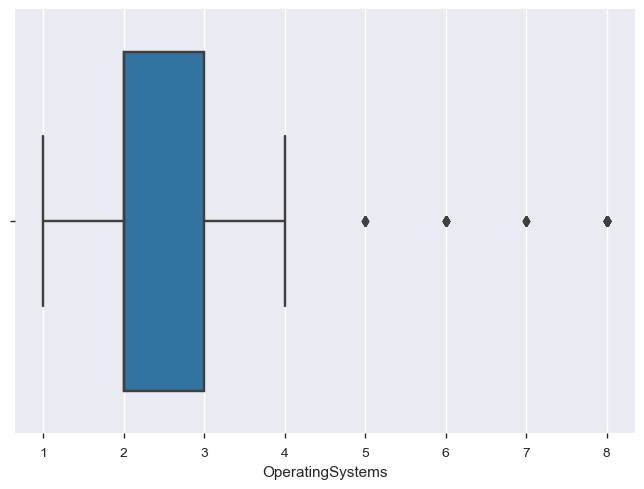

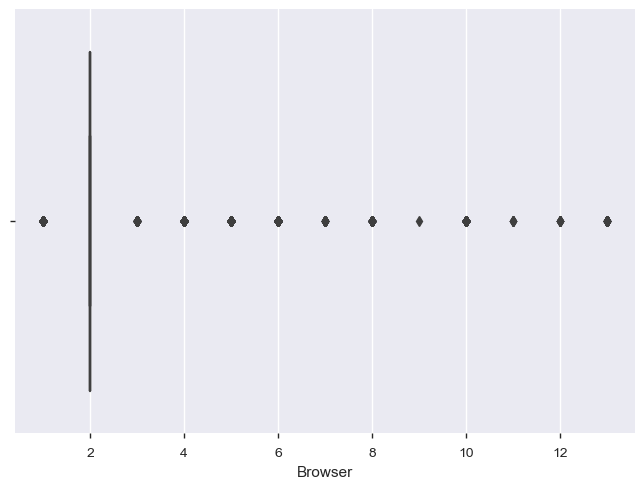

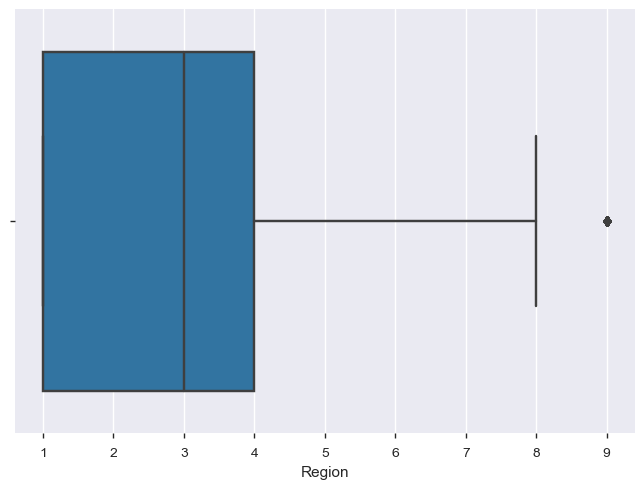

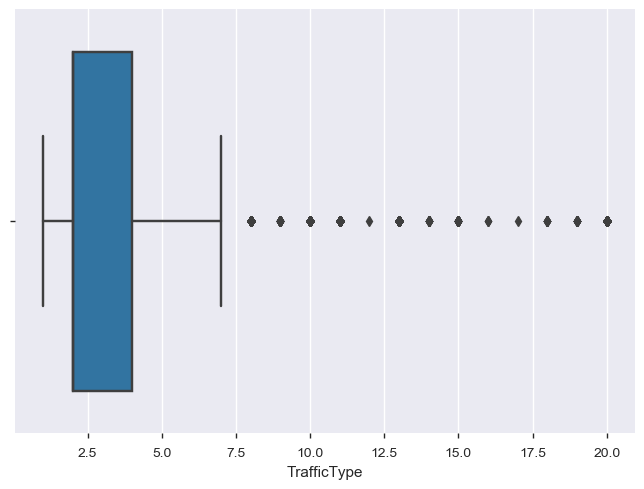

In [11]:
for attribute in df_cols2:
    sns.boxplot(x=df_continuous[attribute])
    plt.show()

In [12]:
sample = df.sample(25)
display(sample)

sample_index = sample.index

Administrative  Administrative_Duration  Informational  \
2841                0                 0.000000              0   
3549                1                 0.000000              0   
6928                0                 0.000000              0   
9334                0                 0.000000              3   
2522                2                58.000000              5   
10183               1                65.500000              0   
12032               1                58.500000              0   
2473               14               662.535714              2   
9746                5               448.500000              4   
8849                0                 0.000000              0   
8287                4               643.833333              0   
1015                2                34.000000              0   
11766               5               115.966667              1   
11689               0                 0.000000              0   
12290               0                 0.000000              0   
9015               10               149.013357              2   
10141               0                 0.000000              0   
5393                4               132.666667              0   
12157               0                 0.000000              0   
8534                0                 0.000000              0   
2280                3                47.000000              0   
1570                3                79.750000              0   
10610               1                 5.000000              0   
6269                1                39.200000              0   
11793               7                45.416667              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2841                      0.0               6               270.214286   
3549                      0.0               7                37.000000   
6928                      0.0              48              1510.383333   
9334                     34.3             137              4045.726634   
2522                    115.0              71              1563.930952   
10183                     0.0               2                99.000000   
12032                     0.0              23              1033.000000   
2473                     58.0              41               854.286325   
9746                     52.0              81              2537.807082   
8849                      0.0              57              2716.666667   
8287                      0.0              17               508.250000   
1015                      0.0              18               671.000000   
11766                     0.0               9               181.300000   
11689                     0.0               5                59.250000   
12290                     0.0              20              1008.500000   
9015                    138.0              78              2207.366936   
10141                     0.0               9               396.166667   
5393                      0.0              25               773.559524   
12157                     0.0              17               289.555556   
8534                      0.0               9               183.333333   
2280                      0.0              22               486.500000   
1570                      0.0               3                73.500000   
10610                     0.0              29              3441.439286   
6269                      0.0              26              1210.917778   
11793                     0.0              35               653.859524   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
2841      0.000000   0.037500    0.000000         0.0   May                 3   
3549      0.083333   0.108333    0.000000         0.6   May                 1   
6928      0.008511   0.030927   16.612117         0.0   Aug                 2   
9334      0.009993   0.021711    0.000000         0.0   Nov        

In [13]:
sample_index

Int64Index([ 2841,  3549,  6928,  9334,  2522, 10183, 12032,  2473,  9746,
             8849,  8287,  1015, 11766, 11689, 12290,  9015, 10141,  5393,
            12157,  8534,  2280,  1570, 10610,  6269, 11793],
           dtype='int64')

In [15]:
for attribute in df_cols:
    fig = px.box(df[attribute],y= attribute, points='outliers')
    fig.show()
 #   y=attribute

# Part 3: Prep the Data for Analysis  <a name="part3"></a>

##### Predict if a web user is going to make a purchase : __*Sale = 1 or No Sale = 0*__

In [16]:
df.iloc[sample_index,:]

Administrative  Administrative_Duration  Informational  \
2841                0                 0.000000              0   
3549                1                 0.000000              0   
6928                0                 0.000000              0   
9334                0                 0.000000              3   
2522                2                58.000000              5   
10183               1                65.500000              0   
12032               1                58.500000              0   
2473               14               662.535714              2   
9746                5               448.500000              4   
8849                0                 0.000000              0   
8287                4               643.833333              0   
1015                2                34.000000              0   
11766               5               115.966667              1   
11689               0                 0.000000              0   
12290               0                 0.000000              0   
9015               10               149.013357              2   
10141               0                 0.000000              0   
5393                4               132.666667              0   
12157               0                 0.000000              0   
8534                0                 0.000000              0   
2280                3                47.000000              0   
1570                3                79.750000              0   
10610               1                 5.000000              0   
6269                1                39.200000              0   
11793               7                45.416667              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2841                      0.0               6               270.214286   
3549                      0.0               7                37.000000   
6928                      0.0              48              1510.383333   
9334                     34.3             137              4045.726634   
2522                    115.0              71              1563.930952   
10183                     0.0               2                99.000000   
12032                     0.0              23              1033.000000   
2473                     58.0              41               854.286325   
9746                     52.0              81              2537.807082   
8849                      0.0              57              2716.666667   
8287                      0.0              17               508.250000   
1015                      0.0              18               671.000000   
11766                     0.0               9               181.300000   
11689                     0.0               5                59.250000   
12290                     0.0              20              1008.500000   
9015                    138.0              78              2207.366936   
10141                     0.0               9               396.166667   
5393                      0.0              25               773.559524   
12157                     0.0              17               289.555556   
8534                      0.0               9               183.333333   
2280                      0.0              22               486.500000   
1570                      0.0               3                73.500000   
10610                     0.0              29              3441.439286   
6269                      0.0              26              1210.917778   
11793                     0.0              35               653.859524   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
2841      0.000000   0.037500    0.000000         0.0   May                 3   
3549      0.083333   0.108333    0.000000         0.6   May                 1   
6928      0.008511   0.030927   16.612117         0.0   Aug                 2   
9334      0.009993   0.021711    0.000000         0.0   Nov        

Encode the 'VisitorType','Weekend', 'Revenue' attributes to prepare for modeling

In [17]:
enc = LabelEncoder()
df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])
# df['Month'] = enc.fit_transform(df['Month']) # need to adjsut to cod ehte months correctly

In [18]:
df.iloc[sample_index,:] # The attributes have been encoded correctly

Administrative  Administrative_Duration  Informational  \
2841                0                 0.000000              0   
3549                1                 0.000000              0   
6928                0                 0.000000              0   
9334                0                 0.000000              3   
2522                2                58.000000              5   
10183               1                65.500000              0   
12032               1                58.500000              0   
2473               14               662.535714              2   
9746                5               448.500000              4   
8849                0                 0.000000              0   
8287                4               643.833333              0   
1015                2                34.000000              0   
11766               5               115.966667              1   
11689               0                 0.000000              0   
12290               0                 0.000000              0   
9015               10               149.013357              2   
10141               0                 0.000000              0   
5393                4               132.666667              0   
12157               0                 0.000000              0   
8534                0                 0.000000              0   
2280                3                47.000000              0   
1570                3                79.750000              0   
10610               1                 5.000000              0   
6269                1                39.200000              0   
11793               7                45.416667              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2841                      0.0               6               270.214286   
3549                      0.0               7                37.000000   
6928                      0.0              48              1510.383333   
9334                     34.3             137              4045.726634   
2522                    115.0              71              1563.930952   
10183                     0.0               2                99.000000   
12032                     0.0              23              1033.000000   
2473                     58.0              41               854.286325   
9746                     52.0              81              2537.807082   
8849                      0.0              57              2716.666667   
8287                      0.0              17               508.250000   
1015                      0.0              18               671.000000   
11766                     0.0               9               181.300000   
11689                     0.0               5                59.250000   
12290                     0.0              20              1008.500000   
9015                    138.0              78              2207.366936   
10141                     0.0               9               396.166667   
5393                      0.0              25               773.559524   
12157                     0.0              17               289.555556   
8534                      0.0               9               183.333333   
2280                      0.0              22               486.500000   
1570                      0.0               3                73.500000   
10610                     0.0              29              3441.439286   
6269                      0.0              26              1210.917778   
11793                     0.0              35               653.859524   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
2841      0.000000   0.037500    0.000000         0.0   May                 3   
3549      0.083333   0.108333    0.000000         0.6   May                 1   
6928      0.008511   0.030927   16.612117         0.0   Aug                 2   
9334      0.009993   0.021711    0.000000         0.0   Nov        

In [19]:
months = df['Month'].values
months

array(['Feb', 'Feb', 'Feb', ..., 'Nov', 'Nov', 'Nov'], dtype=object)

In [20]:
def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

In [21]:
df['Month'] = df['Month'].apply(month_func)

In [22]:
df.iloc[sample_index,:] # The attributes have been encoded correctly


Administrative  Administrative_Duration  Informational  \
2841                0                 0.000000              0   
3549                1                 0.000000              0   
6928                0                 0.000000              0   
9334                0                 0.000000              3   
2522                2                58.000000              5   
10183               1                65.500000              0   
12032               1                58.500000              0   
2473               14               662.535714              2   
9746                5               448.500000              4   
8849                0                 0.000000              0   
8287                4               643.833333              0   
1015                2                34.000000              0   
11766               5               115.966667              1   
11689               0                 0.000000              0   
12290               0                 0.000000              0   
9015               10               149.013357              2   
10141               0                 0.000000              0   
5393                4               132.666667              0   
12157               0                 0.000000              0   
8534                0                 0.000000              0   
2280                3                47.000000              0   
1570                3                79.750000              0   
10610               1                 5.000000              0   
6269                1                39.200000              0   
11793               7                45.416667              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2841                      0.0               6               270.214286   
3549                      0.0               7                37.000000   
6928                      0.0              48              1510.383333   
9334                     34.3             137              4045.726634   
2522                    115.0              71              1563.930952   
10183                     0.0               2                99.000000   
12032                     0.0              23              1033.000000   
2473                     58.0              41               854.286325   
9746                     52.0              81              2537.807082   
8849                      0.0              57              2716.666667   
8287                      0.0              17               508.250000   
1015                      0.0              18               671.000000   
11766                     0.0               9               181.300000   
11689                     0.0               5                59.250000   
12290                     0.0              20              1008.500000   
9015                    138.0              78              2207.366936   
10141                     0.0               9               396.166667   
5393                      0.0              25               773.559524   
12157                     0.0              17               289.555556   
8534                      0.0               9               183.333333   
2280                      0.0              22               486.500000   
1570                      0.0               3                73.500000   
10610                     0.0              29              3441.439286   
6269                      0.0              26              1210.917778   
11793                     0.0              35               653.859524   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
2841      0.000000   0.037500    0.000000         0.0      5   
3549      0.083333   0.108333    0.000000         0.6      5   
6928      0.008511   0.030927   16.612117         0.0      8   
9334      0.009993   0.021711    0.000000         0.0     11   
2522      0.006579   0.017193    0.000000         0.8      5   
10183  

In [23]:
df['Month'].isnull().sum()

0

In [24]:
#outlier_cols= ['Administrative','Informational', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',        
 #                    'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [25]:
# sourced from - https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

# def assign_outlier(datacolumn):
#     Q1,Q3 = np.percentile(datacolumn , [25,75])
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)
#     datacolumn[datacolumn>upper_range] = upper_range
#     datacolumn[datacolumn<lower_range] = lower_range
#     return datacolumn

In [26]:
# encoded_df = df.copy()
# encoded_df[outlier_cols].apply(assign_outlier)

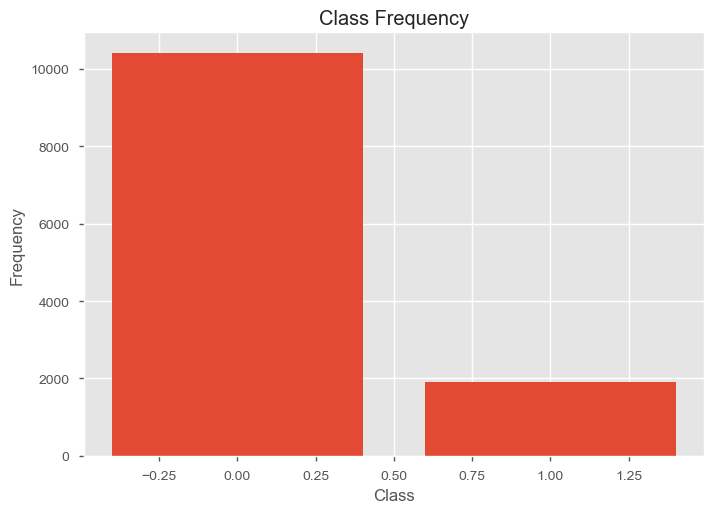

In [27]:
plt.style.use('ggplot')

classes = df['Revenue'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Resampleing the dataset due to Imbalance :SMOTE 

In [29]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [30]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=2019)
print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({0: 10422, 1: 1908})
Resampled dataset shape Counter({0: 10422, 1: 10422})


In [31]:
resampled_df = pd.concat([X_res,y_res], axis =1, join = 'inner')

In [32]:
resampled_df.sample(20)

Administrative  Administrative_Duration  Informational  \
16745               1                54.651489              0   
12657               6               623.588528              0   
9877                2                17.000000              2   
8344                6               479.250000              0   
6455                2               109.800000              0   
12555               6               873.126567              0   
3459                0                 0.000000              0   
8947                4                26.000000              0   
20770               7               387.161311              0   
17172               0                 0.000000              0   
9315                0                 0.000000              0   
124                 0                 0.000000              0   
17880               2                52.400927              0   
6296                6               268.950000              2   
1852                3                58.066667              0   
18427               1                35.824205              0   
11314               8               264.809524              0   
2916                0                 0.000000              0   
7035                0                 0.000000              0   
13392               0                 1.447080              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
16745                0.000000              30               541.556107   
12657                1.310108              48              1349.184601   
9877              1231.000000               8                27.375000   
8344                 0.000000              51              2156.525403   
6455                 0.000000              32               897.361905   
12555                0.000000              37              1151.576862   
3459                 0.000000               6                56.000000   
8947                 0.000000             235             10046.807710   
20770                0.000000              15               351.512536   
17172                0.000000              46               926.307960   
9315                 0.000000              38              1338.778571   
124                  0.000000              11               292.900000   
17880                0.000000               2                24.032334   
6296               153.000000             139              5286.587577   
1852                 0.000000               5                86.000000   
18427               49.691639              86              3312.926662   
11314                0.000000              35              1039.887446   
2916                 0.000000              19               130.500000   
7035                 0.000000              58              1076.073649   
13392                0.000000              17               636.829947   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
16745     0.000000   0.010045   78.650147         0.0     11   
12657     0.000000   0.005102   33.210469         0.0      5   
9877      0.038889   0.088889    0.000000         0.0     11   
8344      0.000000   0.011879    6.229995         0.0     11   
6455      0.005882   0.035621    0.000000         0.0      9   
12555     0.000000   0.012573   54.255219         0.0      5   
3459      0.040000   0.080000    0.000000         0.0      5   
8947      0.007671   0.022528    0.000000         0.0     11   
20770     0.001057   0.015743   13.138421         0.0     11   
17172     0.000000   0.004511   25.313350         0.0      9   
9315      0.011111   0.024533    0.000000         0.0     11   
124       0.028000   0.119524    0.000000         0.0      2   
17880     0.000000   0.042783    0.000000         0.0     11   
6296      0.002959   0.018210    0.000000         0.0     11   
1852      0.000000   0.012500    0.000000         0.0      3   
18427     0.014166   0.025022    0.000000         0.0     11  

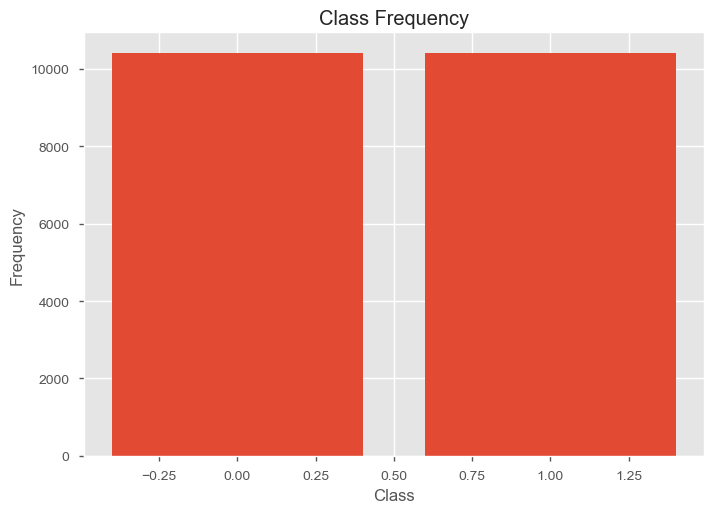

In [33]:
plt.style.use('ggplot')

classes = resampled_df['Revenue'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018881F346D8>,
      dtype=object)

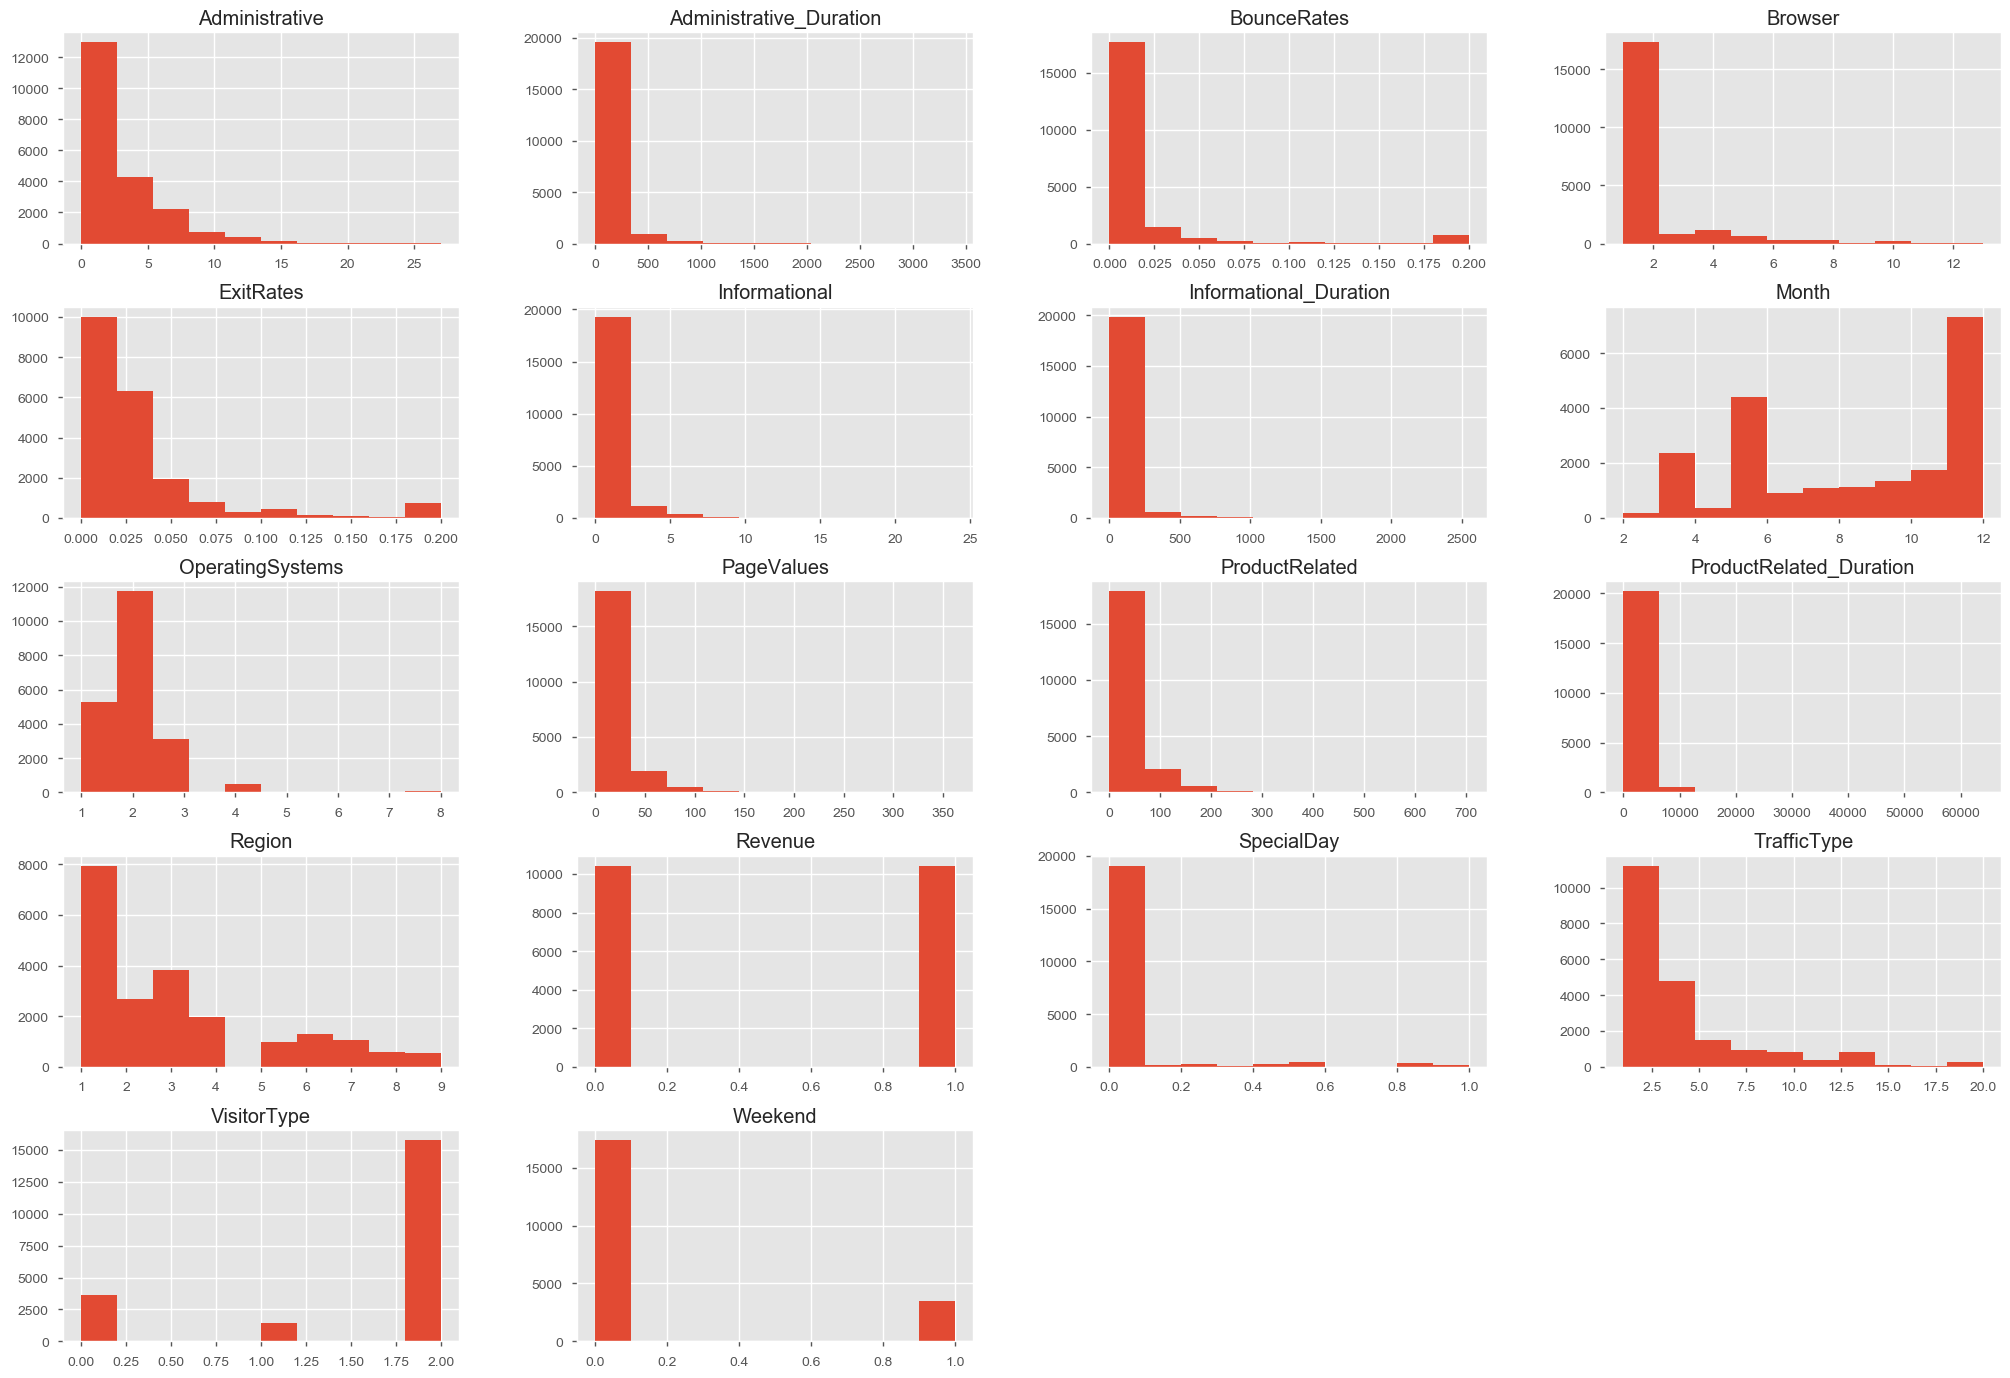

In [36]:
display(resampled_df.hist( figsize = (25,17)))

# Part 4: Placeholder <a name="part4"></a>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=500) 

In [39]:
scaler = StandardScaler().fit(X_train) 
standardized_X = scaler.transform(X_train) 
standardized_X_test = scaler.transform(X_test)


In [43]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(standardized_X, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(standardized_X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7312120243044452


In [45]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1834, 1339],
       [ 342, 2739]], dtype=int64)

Text(0.5, 489.55555555555554, 'Predicted label')

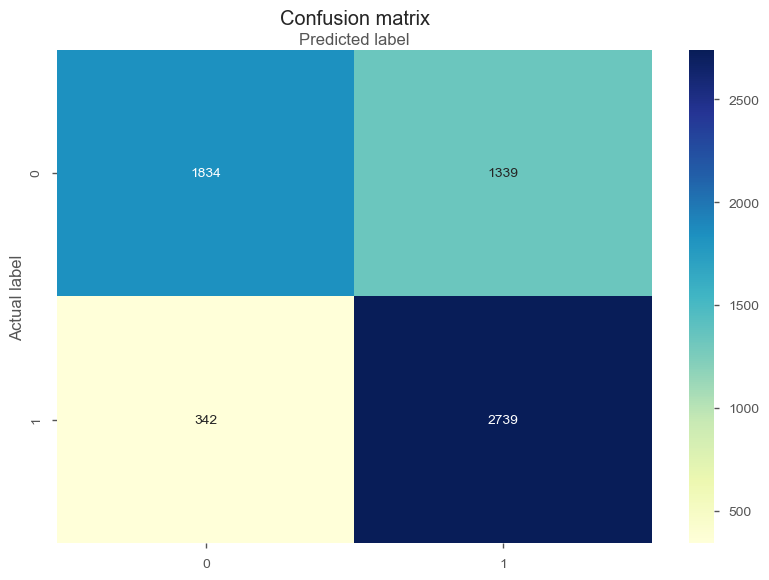

In [46]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69      3173
           1       0.67      0.89      0.77      3081

    accuracy                           0.73      6254
   macro avg       0.76      0.73      0.73      6254
weighted avg       0.76      0.73      0.72      6254

Accuracy: 0.7312120243044452


# Part 5: Placeholder  <a name="part5"></a>

In [ ]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_res, y_res, test_size=0.3,random_state=500) 

In [ ]:
scaler = StandardScaler().fit(X_train) 
standardized_X_svc = scaler.transform(X_train_svc) 
standardized_X_test_svc = scaler.transform(X_test_svc)

In [ ]:
#Create a SVC Classifier
svc = SVC(kernel='linear',cache_size=7000)

#Train the model using the training sets
svc.fit(standardized_X_svc, y_train_svc)

#Predict the response for test dataset
y_pred_svc = svc.predict(standardized_X_test_svc)

In [ ]:
print("Accuracy_svc:",metrics.accuracy_score(y_test_svc, y_pred_svc))

In [ ]:
cnf_matrix_svc = metrics.confusion_matrix(y_test_svc, y_pred_svc)
cnf_matrix_svc

In [ ]:
class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test_svc, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test_svc, y_pred_svc))

# Part 6: Placeholder  <a name="part6"></a>

# Part 7: Placeholder  <a name="part7"></a>

# Part 7: Sources  <a name="part8"></a>
1. https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg
2. https://support.google.com/analytics

# Sand Box Code

In [ ]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [ ]:
# df_continuous = df[['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
# #df_continuous
# import plotly.express as px

# fig = px.scatter_matrix(df_continuous)
# fig.show()

In [ ]:
# https://plot.ly/python/box-plots/
#df = px.data.tips()
import plotly.express as px
for attribute in df_cols:
    fig = px.box(df_continuous[attribute],y= attribute ,points="outliers")
    fig.show()

In [ ]:
fig = px.parallel_coordinates(sample, color="Revenue",
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()
# labels={"species_id": "Species",
 #                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
  #                "petal_width": "Petal Width", "petal_length": "Petal Length", }

In [ ]:
display(df_continuous.describe())

In [ ]:
# When used for statistical data visualisation there are three important considerations: 
    # the order, the rotation, and the scaling of the axes. 
import plotly.express as px
fig = px.parallel_categories(sample, color = 'Weekend',color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()